Experiment No. 15

Outlier Detection & Removal Analysis Using Algorithm

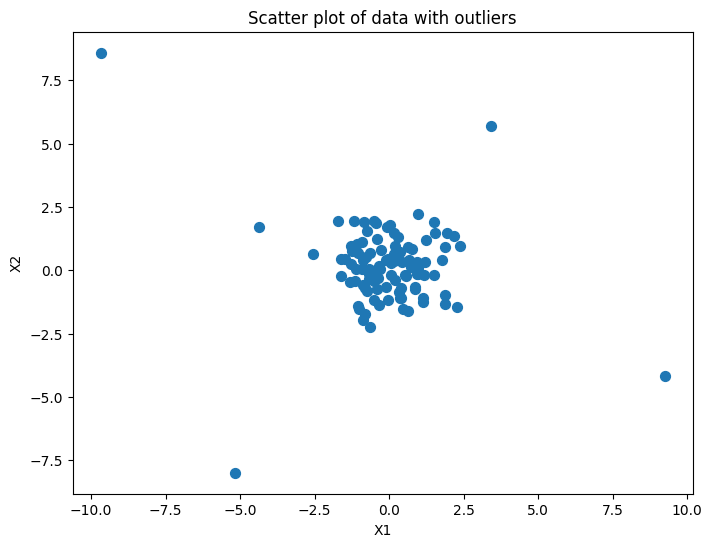

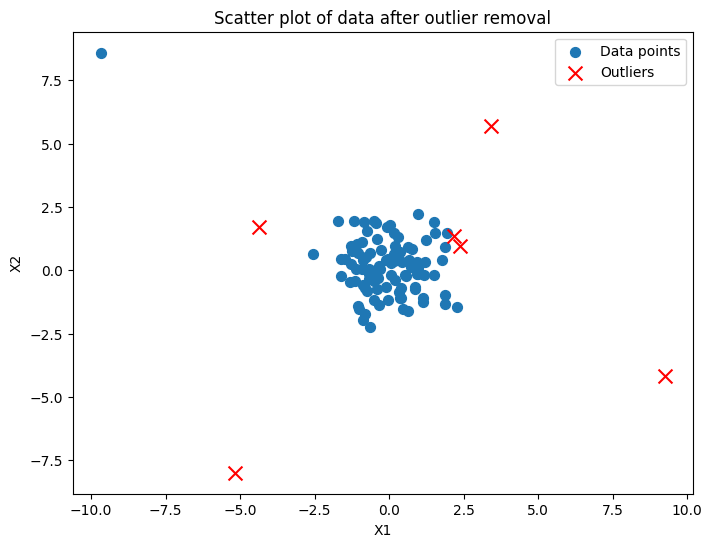

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data
np.random.seed(0)
X = np.random.randn(100, 2)

# Add some outliers
outliers = np.random.uniform(low=-10, high=10, size=(5, 2))
X = np.vstack([X, outliers])

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Scatter plot of data with outliers')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Use K-means to detect outliers
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Calculate distances to nearest cluster center
distances = np.zeros(X.shape[0])
for i in range(len(X)):
    cluster_center = centers[y_kmeans[i]]
    distances[i] = np.linalg.norm(X[i] - cluster_center)

# Set a threshold for outlier detection
threshold = np.percentile(distances, 95)

# Identify outliers
outliers_indices = np.where(distances > threshold)[0]

# Remove outliers
X_clean = np.delete(X, outliers_indices, axis=0)

# Visualize the data after removing outliers
plt.figure(figsize=(8, 6))
plt.scatter(X_clean[:, 0], X_clean[:, 1], s=50, label='Data points')
plt.scatter(X[outliers_indices, 0], X[outliers_indices, 1], color='red', marker='x', s=100, label='Outliers')
plt.title('Scatter plot of data after outlier removal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
